# Inflation in Fandango Movie Ratings

This investigation shows that [Fandango](https://fandango.com), one of the largest sellers of movie theater tickets in the United States, was showing inflated ratings of movies anywhere from 0.3 to 0.5 stars (on a 5-star scale). For example, a movie that was given a rating of 4.1 stars by users could be rounded up to 4.5 stars.

Consequently, an analysis of the 2016-2017 movie rating data shows that Fandango fixed their rating system, after an article by [FiveThirtyEight](https://fivethirtyeight.com/features/fandango-movies-ratings/) showed the discrepancy between the movies' actual ratings and their advertised ratings (which this analysis gets its data from).

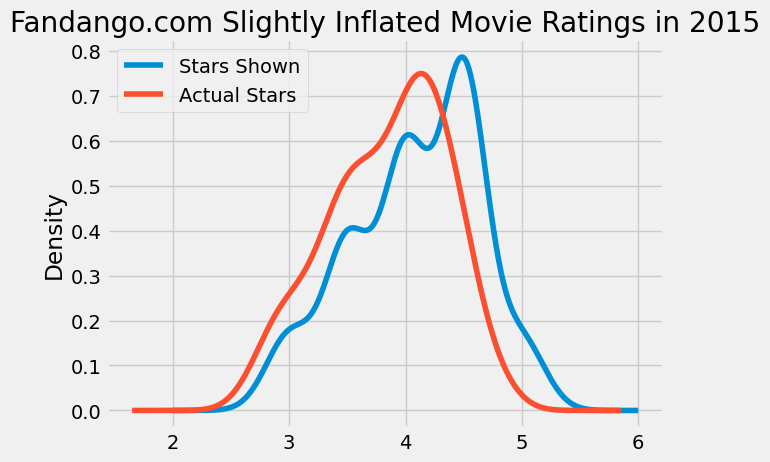

**Note** that [Fandango did respond](https://fivethirtyeight.com/features/fandango-movies-ratings/) to FiveThirtyEight's analysis in 2015, saying that the rating issue was a coding error, that they would fix it right away, and that their iOS app's movie ratings did not have this error.

**Datasets:**
* [FiveThirtyEight Fandango Movie Ratings 2015](https://www.kaggle.com/datasets/fivethirtyeight/fivethirtyeight-fandango-dataset)
* [DataQuest Fandango Movie Ratings 2016-2017](https://www.kaggle.com/datasets/rislam4/movies-rating-in-20162017)

### Imports and Data

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use("fivethirtyeight")

In [5]:
fandango_2015 = pd.read_csv('data/fandango_score_comparison.csv')

## Initial Investigation
Back in 2015, Fandango had a 5-star rating system for all movies for which they were selling tickets.

While looking at the HTML and UI of Fandango.com, Walt Hickey of FiveThirtyEight noticed that Fandango was rounding values up to the nearest 0.5 increment, meaning that most movies got anywhere from a 0.1 to 0.5 boost in their start rating. For example, any movie with a rating greater than 4.0 stars (e.g. 4.1) was being rounded up to a 4.5-star rating. Several movies that were 4.5 stars were also bumped up to 5 stars.

While rounding of numbers up or down a 0.1-0.2 increment is reasonable, always rounding up and adding 0.5 stars to scores is not. Overall, most movies released in 2015 on the website appeared to be rated more highly than they were.

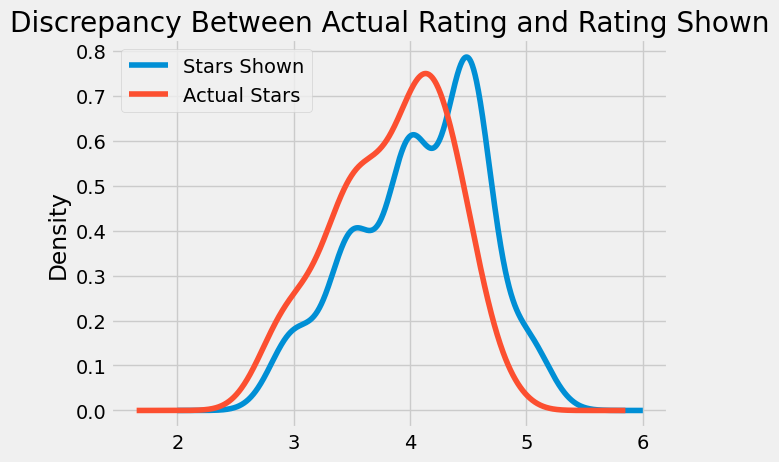

In [6]:
fandango_2015['Fandango_Stars'].plot.kde(label="Stars Shown")
fandango_2015['Fandango_Ratingvalue'].plot.kde(label="Actual Stars")
plt.legend()
plt.title("Discrepancy Between Actual Rating and Rating Shown")
plt.show()

As seen above, **all of the ratings are nudged slightly higher** (about 0.5 stars) for each movie. Movies that might be more accurately called "4.0 star" movies were advertised as 4.5 instead.

Text(0.5, 1.0, 'Typical Amounts of Inflation in Movie Ratings')

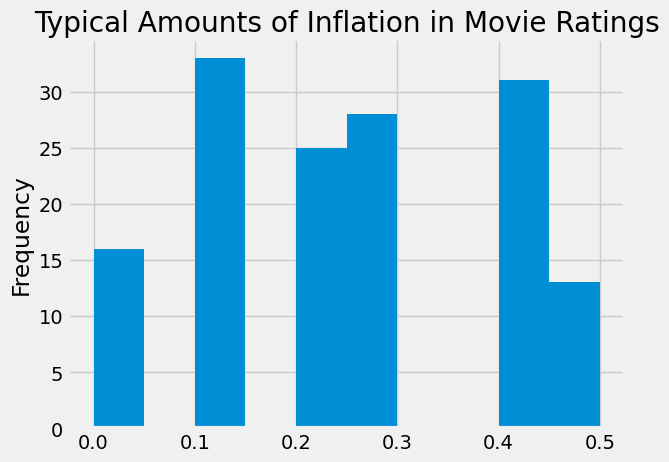

In [7]:
fandango_2015['Fandango_Difference'].plot.hist()
plt.title("Typical Amounts of Inflation in Movie Ratings")

**Movies were inflated anywhere from 0.1 to 0.5 stars**. Only 16 of 146 movies showed their true rating.

In [8]:
inflation_counts = fandango_2015[fandango_2015['Fandango_Difference'] >= 0.3]['Fandango_Difference'].value_counts().sort_index()
inflation_counts

Fandango_Difference
0.3    28
0.4    31
0.5    13
Name: count, dtype: int64

**49% of the movies** (72 out of 146) were excessively rounded up.
A case could be made that Fandango's developers were trying to round off the ratings into satisfying numbers (3.5, 4.0, 4.5, etc.), but there are no negative differences in scores and thus no rounding down. 
**This means that scores were overall slightly inflated.**

## Did Fandango Fix Their Ratings?
After FiveThirtyEight published their findings that Fandango was inflating scores, Fandango promised to fix it. But did they?

An analysis on movie rating data from 2016 and 2017 shows that **they likely did**.

In [9]:
fandango_2016 = pd.read_csv('data/movie_ratings_16_17.csv')

Comparing 2015 movie ratings to 2016/2017 movie ratings, we see that **the scores are overall lower in 2016/2017**. What's more is that they're lower by about 0.5, the **same amount of bias** that we saw in 2015's inflated scores.

Text(0.5, 1.0, '2015 Movie Ratings vs. 2016/2017 Move Ratings')

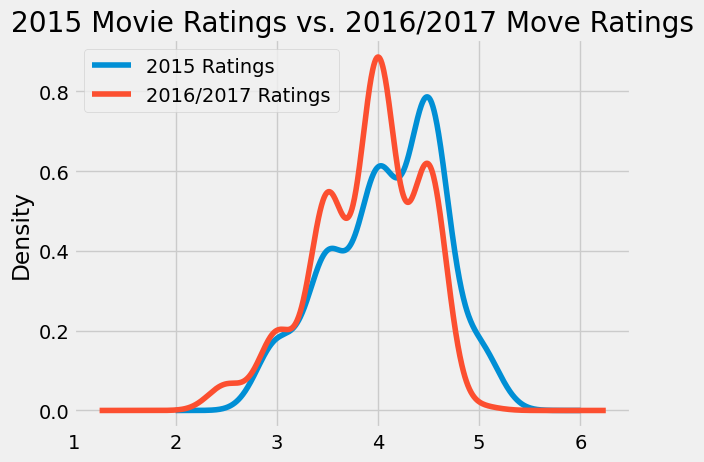

In [10]:
fandango_2015['Fandango_Stars'].plot.kde(label="2015 Ratings")
fandango_2016['fandango'].plot.kde(label="2016/2017 Ratings")
plt.legend()
plt.title('2015 Movie Ratings vs. 2016/2017 Move Ratings')

While the movie scores for 2016/2017 are all rounded to 0.5 increments (3.5, 4.0, etc.), they do not appear to be have hidden inflation. If we overlay 2016/2017 movie ratings with the actual, non-inflated movie ratings from 2015, we see that they have a similar distribution below. Contrast that with the graph above, where the allegedly-inflated 2015 ratings cluster around 4.0 and 4.5 more than expected.

Text(0.5, 1.0, '2015 Movie Ratings vs. 2016/2017 Move Ratings')

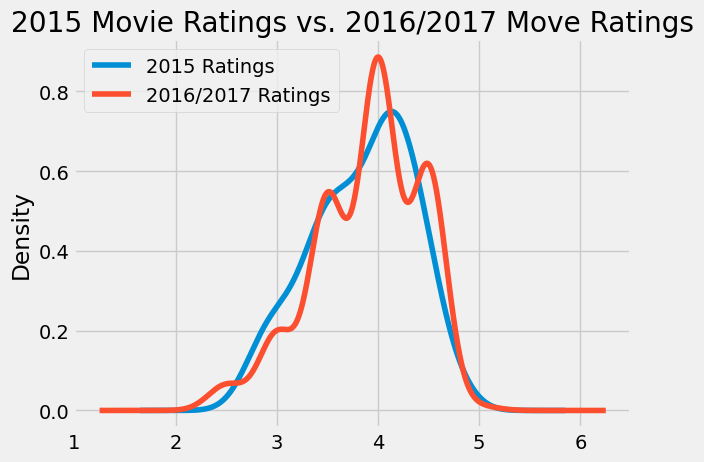

In [11]:
fandango_2015['Fandango_Ratingvalue'].plot.kde(label="2015 Ratings")
fandango_2016['fandango'].plot.kde(label="2016/2017 Ratings")
plt.legend()
plt.title('2015 Movie Ratings vs. 2016/2017 Move Ratings')

The tables below show that the 2016/2017 data and the inflated ratings adhere to increments of 0.5 but that the true ratings for 2015 are more precise. Data that is this precise is not available for 2016/2017 movie ratings, so it is not possible to ascertain whether or not true ratings for 2016/2017 were lower yet still rounded up in an inflationary way. However, it should be noted that the graph below for 2016/2017 shows a bell-curve-like distribution, whereas ther 2015 graph below shows a strong left skew, hinting that the 2016/2017 data is more genuine and less likely to be inflated.

Text(0.5, 0, 'Rating (out of 5 stars)')

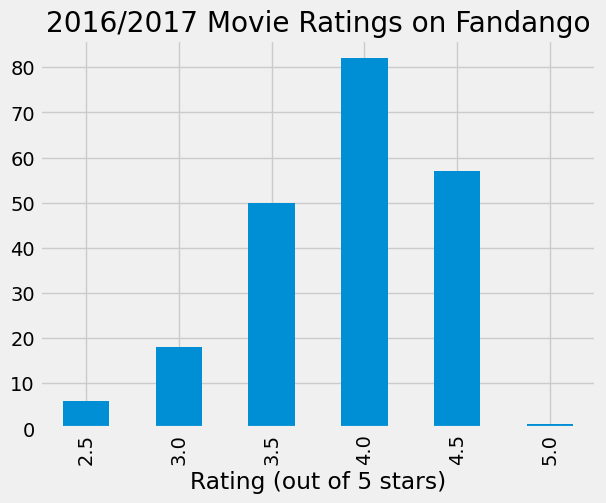

In [17]:
fandango_2016['fandango'].value_counts().sort_index().plot.bar()
plt.title('2016/2017 Movie Ratings on Fandango')
plt.xlabel('Rating (out of 5 stars)')

Text(0.5, 0, 'Rating (out of 5 stars)')

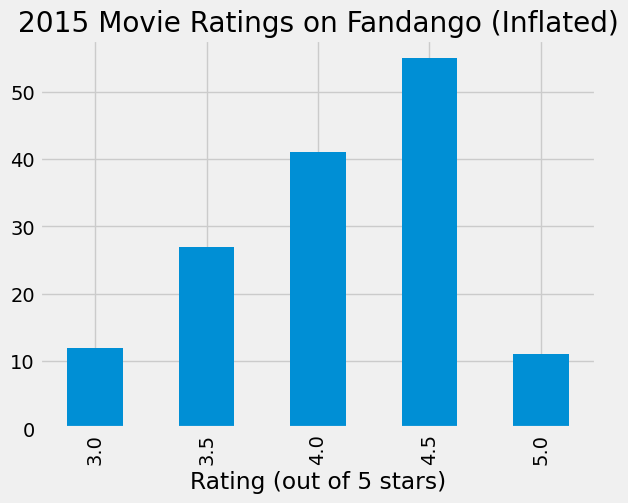

In [18]:
fandango_2015['Fandango_Stars'].value_counts().sort_index().plot.bar()
plt.title('2015 Movie Ratings on Fandango (Inflated)')
plt.xlabel('Rating (out of 5 stars)')

Text(0.5, 0, 'Rating (out of 5 stars)')

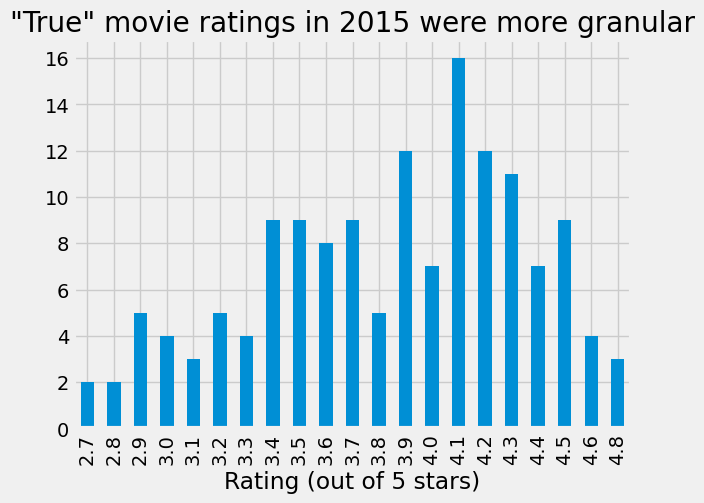

In [19]:
fandango_2015['Fandango_Ratingvalue'].value_counts().sort_index().plot.bar()
plt.title('"True" movie ratings in 2015 were more granular')
plt.xlabel('Rating (out of 5 stars)')

## Final Thoughts
Fandango claimed to have made their movie ratings more accurate as of 2016--and this does appear to be true--but we can't confirm this since Fandango removed star-ratings from their site in the years since. What we do know is that the ratings for movies released in 2016 and 2017 were similar to the "true" movie ratings in 2015. **This indicates that Fandango may have fixed their inflation problem.**

However, it is still possible that scores for 2016 and 2017 were inflated. It may be that the movies released in 2016/2017 were of worse quality than those in 2015 and that Fandango still inflated the scores. To know whether inflation did not occur in 2016-2017 for sure, we would need data on the precise ratings of the movies before they were rounded to 3.5, 4.0, and the like. In order for us to use the similarity in ratings between the two groups as proof that the 2015 data was fixed, we have to assume that the quality of movies released during both time periods was of equal quality.

Therefore, **if we believe that the quality of movies between the 2015 and 2016-2017 timeframes were roughly the same**, then we can accept that Fandango stopped inflating movie ratings. **If we do not believe that movie quality stayed the same throughout those years however**, then we should not accept this as evidence that Fandango is no longer inflating scores.

**Today, Fandango does not use the star-rating system** for movies but rather percentage scores from Rotten Tomatoes ([which Fandango bought in 2016](https://techcrunch.com/2016/02/17/fandango-buys-flixster-rotten-tomatoes/)). To see Fandango's rating accuracy today, a **follow-up investigation** could involve calculating the accuracy of the conversion of each user's star rating to the final percentage shown on Rotten Tomatoes or the like.